# Digit recognizer

Knowledge competition. [Takes an image of a handwritten single digit, and determine what that digit is](https://www.kaggle.com/c/digit-recognizer).

Just copied all the data into data folder.

In [1]:
%%bash
ls data

sample_submission.csv
test.csv
train.csv


Importing main libraries and reading the data. Outputting the datafreame to make sure that everything is correct.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data_train = pd.DataFrame.from_csv("data/train.csv", index_col=False)
data_test = pd.DataFrame.from_csv("data/test.csv", index_col=False)

In [3]:
data_train.head(n=3)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
np_train = data_train.values
np_test_X = data_test.values

Checking the size of the data and dividing training data into samples and target.

In [5]:
print np_train.shape
print np_test_X.shape
np_train_Y = np_train[:,0]
np_train_X = np_train[:,1:]

(42000, 785)
(28000, 784)


We know how the data looks like, but just for the sake of completeness, visualizing it.

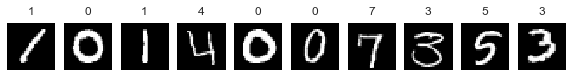

In [6]:
def show_data(imgs, names=None):
    n = 10
    plt.figure(figsize=(10, 5))
    plt.gray()
    for i in xrange(n):
        ax = plt.subplot(1, n, i + 1)
        ax.matshow(imgs[i,...])
        plt.xticks([])
        plt.yticks([])
        if names is not None:
            plt.title(names[i])

images = np_train_X.reshape((42000, 28, 28))
show_data(images, np_train_Y)

Grouping values that belong to the same class together. I also normalize the data `X_`.

In [7]:
X = np.vstack([np_train_X[np_train_Y == i] for i in xrange(10)])
y = np.hstack([np_train_Y[np_train_Y==i] for i in xrange(10)])
X_ = X / 255.

-----
Before going further, I am going to split data into test/train set and write a helper function which calculates the percentage of correct data.

In [8]:
def show_score(y_real, y_predicted):
    return sum(y_real == y_predicted) / float(len(y_real))

In [12]:
from sklearn.cross_validation import train_test_split
from sklearn import linear_model
from sklearn import svm
from sklearn import neighbors
from sklearn import tree
from sklearn import ensemble
import xgboost as xgb
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.40, random_state=0)

Now run many different classifiers just to see how they perform out of the box without dimensionality reduction
## Trying many models with no tuning, no dimensionality reduction

In [10]:
%%time
clf = linear_model.LogisticRegression(penalty='l1').fit(X_train, y_train)
print show_score(clf.predict(X_test), y_test)

0.91369047619
CPU times: user 26.5 s, sys: 466 ms, total: 27 s
Wall time: 27.5 s


In [11]:
%%time
clf = linear_model.RidgeClassifier(alpha=.5).fit(X_train, y_train)
print show_score(clf.predict(X_test), y_test)

0.848630952381
CPU times: user 1.68 s, sys: 154 ms, total: 1.84 s
Wall time: 971 ms


In [12]:
%%time
clf = svm.SVC().fit(X_train, y_train)
print show_score(clf.predict(X_test), y_test)

0.93255952381
CPU times: user 6min 4s, sys: 2.32 s, total: 6min 6s
Wall time: 6min 10s


In [13]:
%%time
clf = svm.SVC(kernel="sigmoid").fit(X_train, y_train)
print show_score(clf.predict(X_test), y_test)

0.112857142857
CPU times: user 25min 24s, sys: 6.34 s, total: 25min 30s
Wall time: 25min 39s


In [14]:
%%time
clf = svm.LinearSVC().fit(X_train, y_train)
print show_score(clf.predict(X_test), y_test)

0.907321428571
CPU times: user 32.5 s, sys: 70.1 ms, total: 32.6 s
Wall time: 32.6 s


In [15]:
%%time
clf = svm.NuSVC().fit(X_train, y_train)
print show_score(clf.predict(X_test), y_test)

0.883273809524
CPU times: user 19min 5s, sys: 1.71 s, total: 19min 7s
Wall time: 19min 7s


In [16]:
%%time
clf = linear_model.SGDClassifier(loss="hinge", penalty="l2").fit(X_train, y_train)
print show_score(clf.predict(X_test), y_test)

0.880952380952
CPU times: user 1.54 s, sys: 37.1 ms, total: 1.57 s
Wall time: 1.49 s


In [23]:
%%time
clf = linear_model.SGDClassifier(loss="hinge", penalty="l1").fit(X_train, y_train)
print show_score(clf.predict(X_test), y_test)

0.899464285714
CPU times: user 5.56 s, sys: 65.9 ms, total: 5.63 s
Wall time: 5.58 s


In [17]:
%%time
clf = neighbors.KNeighborsClassifier().fit(X_train, y_train)
print show_score(clf.predict(X_test), y_test)

0.965357142857
CPU times: user 9min 23s, sys: 2.86 s, total: 9min 26s
Wall time: 9min 32s


In [18]:
%%time
clf = tree.DecisionTreeClassifier().fit(X_train, y_train)
print show_score(clf.predict(X_test), y_test)

0.85375
CPU times: user 9.24 s, sys: 105 ms, total: 9.35 s
Wall time: 9.45 s


In [19]:
%%time
clf = ensemble.RandomForestClassifier(n_estimators=100).fit(X_train, y_train)
print show_score(clf.predict(X_test), y_test)

0.962083333333
CPU times: user 21.6 s, sys: 390 ms, total: 22 s
Wall time: 22.3 s


In [20]:
%%time
clf = ensemble.AdaBoostClassifier().fit(X_train, y_train)
print show_score(clf.predict(X_test), y_test)

0.702321428571
CPU times: user 37.2 s, sys: 324 ms, total: 37.5 s
Wall time: 38 s


In [21]:
%%time
clf = ensemble.GradientBoostingClassifier().fit(X_train, y_train)
print show_score(clf.predict(X_test), y_test)

0.941369047619
CPU times: user 30min 29s, sys: 10.8 s, total: 30min 39s
Wall time: 30min 59s


In [22]:
%%time
clf = ensemble.BaggingClassifier().fit(X_train, y_train)
print show_score(clf.predict(X_test), y_test)

0.91875
CPU times: user 56.1 s, sys: 1.58 s, total: 57.7 s
Wall time: 58.1 s


In [11]:
%%time
clf = xgb.XGBClassifier(max_depth=7, n_estimators=100, learning_rate=0.05).fit(X_train, y_train)
print show_score(clf.predict(X_test), y_test)

0.954404761905
CPU times: user 21min 13s, sys: 6.85 s, total: 21min 20s
Wall time: 21min 30s


The data does not have missing values, outliers and it is already normalized. So I can only try to reduce dimensionality.

## Few models with dimensionality reduction

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(X_train)
print sum(pca.explained_variance_ratio_) 

0.826230681117


In [11]:
X_train_, X_test_ = pca.transform(X_train), pca.transform(X_test) 

In [12]:
%%time
clf = xgb.XGBClassifier(max_depth=7, n_estimators=100, learning_rate=0.05).fit(X_train_, y_train)
print show_score(clf.predict(X_test_), y_test)

0.933333333333
CPU times: user 3min 20s, sys: 573 ms, total: 3min 20s
Wall time: 3min 21s


In [13]:
%%time
clf = ensemble.RandomForestClassifier(n_estimators=100).fit(X_train_, y_train)
print show_score(clf.predict(X_test_), y_test)

0.94875
CPU times: user 25.1 s, sys: 279 ms, total: 25.4 s
Wall time: 25.5 s


In [14]:
%%time
clf = neighbors.KNeighborsClassifier().fit(X_train_, y_train)
print show_score(clf.predict(X_test_), y_test)

0.972916666667
CPU times: user 37.9 s, sys: 126 ms, total: 38 s
Wall time: 38.1 s


It looks like dimensionality reduction helps a little bit (at least with k-nn). The last attempt is to do some parameter tuning. For this I need to divide into train, test, validation. Then I will try Random forest, XGBoost, k-nn, SVC, logistic regression.

## Parameter tuning with PCA

In [9]:
from sklearn.decomposition import PCA
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.grid_search import GridSearchCV
X_reduced = PCA(n_components=50).fit_transform(X_)

In [22]:
%%time
k_fold = KFold(len(y), n_folds=2, shuffle=True, random_state=0)
clf = linear_model.SGDClassifier(loss="hinge", penalty="l1")
print np.average(cross_val_score(clf, X_reduced, y, cv=k_fold, n_jobs=1))

0.878880952381
CPU times: user 953 ms, sys: 34.3 ms, total: 988 ms
Wall time: 978 ms


In [30]:
%%time
parameters = {
    'n_neighbors': [5, 10, 15],
    'weights':['uniform', 'distance'],
    'p': [1, 2, 3]
}
model = neighbors.KNeighborsClassifier()
clf = GridSearchCV(model, parameters, cv=k_fold)
clf.fit(X_reduced, y)
print clf.grid_scores_
print clf.best_score_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance')
0.970095238095
CPU times: user 1h 14min 53s, sys: 23.3 s, total: 1h 15min 16s
Wall time: 1h 15min 57s


In [31]:
%%time
parameters = {
    'n_estimators': [100, 200, 300],
    'criterion':['gini', 'entropy'],
    'max_depth': [5, 8, 10, 15]
}
model = ensemble.RandomForestClassifier()
clf = GridSearchCV(model, parameters, cv=k_fold)
clf.fit(X_reduced, y)
print clf.grid_scores_
print clf.best_score_

[mean: 0.81638, std: 0.00910, params: {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 5}, mean: 0.81757, std: 0.00043, params: {'n_estimators': 200, 'criterion': 'gini', 'max_depth': 5}, mean: 0.82071, std: 0.00133, params: {'n_estimators': 300, 'criterion': 'gini', 'max_depth': 5}, mean: 0.88493, std: 0.00107, params: {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 8}, mean: 0.88740, std: 0.00131, params: {'n_estimators': 200, 'criterion': 'gini', 'max_depth': 8}, mean: 0.88814, std: 0.00267, params: {'n_estimators': 300, 'criterion': 'gini', 'max_depth': 8}, mean: 0.90852, std: 0.00452, params: {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 10}, mean: 0.91152, std: 0.00224, params: {'n_estimators': 200, 'criterion': 'gini', 'max_depth': 10}, mean: 0.91271, std: 0.00324, params: {'n_estimators': 300, 'criterion': 'gini', 'max_depth': 10}, mean: 0.93679, std: 0.00326, params: {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 15}, mean: 0.93943, std: 0.002

In [33]:
%%time
parameters = {
    'n_estimators': [100, 200, 300],
    'learning_rate':[0.1, 0.01, 0.5],
    'max_depth': [5, 10, 15]
}
model = xgb.XGBClassifier()
clf = GridSearchCV(model, parameters, cv=k_fold)
clf.fit(X_reduced, y)
print clf.grid_scores_
print clf.best_score_

[mean: 0.93550, std: 0.00288, params: {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 5}, mean: 0.94845, std: 0.00379, params: {'n_estimators': 200, 'learning_rate': 0.1, 'max_depth': 5}, mean: 0.95307, std: 0.00312, params: {'n_estimators': 300, 'learning_rate': 0.1, 'max_depth': 5}, mean: 0.94162, std: 0.00290, params: {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 10}, mean: 0.94879, std: 0.00226, params: {'n_estimators': 200, 'learning_rate': 0.1, 'max_depth': 10}, mean: 0.95048, std: 0.00214, params: {'n_estimators': 300, 'learning_rate': 0.1, 'max_depth': 10}, mean: 0.94152, std: 0.00252, params: {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 15}, mean: 0.94750, std: 0.00231, params: {'n_estimators': 200, 'learning_rate': 0.1, 'max_depth': 15}, mean: 0.94936, std: 0.00212, params: {'n_estimators': 300, 'learning_rate': 0.1, 'max_depth': 15}, mean: 0.85593, std: 0.00036, params: {'n_estimators': 100, 'learning_rate': 0.01, 'max_depth': 5}, mean: 0.8761

---
## It looks like k-NN gave the best results.

In [15]:
pca = PCA(n_components=50)
pca.fit(X_)
X_train, X_test = pca.transform(X_), pca.transform(np_test_X / 255.)

In [18]:
print X_train.shape
print y.shape

(42000, 50)
(42000,)


In [19]:
%%time
clf = neighbors.KNeighborsClassifier(n_neighbors=5, p=2)
clf.fit(X_train, y)
res = clf.predict(X_test)

CPU times: user 1min 45s, sys: 716 ms, total: 1min 46s
Wall time: 1min 47s


In [20]:
submission = pd.DataFrame({"ImageId": range(1, X_test.shape[0] + 1), "label": res})
submission.to_csv("output.csv", index=False)